In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ipl_pairs.csv')

In [10]:
dataset

,Unnamed: 0,batsman,bowler,batsman_runs,total_runs,dismissals,balls,strike_rate,economy,bowler_strike_rate,bowler_average
0,0,DA Warner,TS Mills,4.0,6.0,0.1,5.0,80.000000,7.200000,50.0,60.0
1,5,S Dhawan,TS Mills,2.0,3.0,0.1,4.0,50.000000,4.500000,40.0,30.0
2,7,S Dhawan,A Choudhary,3.0,3.0,0.1,5.0,60.000000,3.600000,50.0,30.0
3,8,DA Warner,A Choudhary,10.0,11.0,1.0,4.0,250.000000,16.500000,4.0,11.0
4,12,MC Henriques,A Choudhary,6.0,6.0,0.1,4.0,150.000000,9.000000,40.0,60.0
5,15,MC Henriques,TS Mills,4.0,4.0,0.1,4.0,100.000000,6.000000,40.0,40.0
6,20,MC Henriques,YS Chahal,36.0,36.0,1.0,23.0,156.521739,9.391304,23.0,36.0
7,22,S Dhawan,YS Chahal,36.0,36.0,1.0,36.0,100.000000,6.000000,36.0,36.0
8,26,S Dhawan,S Aravind,8.0,8.0,0.1,9.0,88.888889,5.333333,90.0,80.0
9,27,MC Henriques,S Aravind,21.0,21.0,0.1,10.0,210.000000,12.600000,100.0,210.0


In [13]:
dataset[(dataset['batsman'] == 'AB de Villiers') & (dataset['bowler'] == 'KH Pandya')]

,Unnamed: 0,batsman,bowler,batsman_runs,total_runs,dismissals,balls,strike_rate,economy,bowler_strike_rate,bowler_average,metric
567,2651,AB de Villiers,KH Pandya,33.0,39.0,4.0,34.0,97.058824,6.882353,8.5,9.75,9.463235


In [7]:
dataset['dismissals'].replace(0, 0.1, inplace=True)

In [9]:
dataset['strike_rate'] = dataset['batsman_runs'] * 100 / dataset['balls']
dataset['economy'] = dataset['total_runs'] * 6 / dataset['balls']
dataset['bowler_strike_rate'] = dataset['balls'] / dataset['dismissals']
dataset['bowler_average'] = dataset['total_runs'] / dataset['dismissals']

In [45]:
dataset['metric'] = (dataset['batsman_runs'] * dataset['total_runs']) / (dataset['dismissals'] * dataset['balls'])

In [47]:
col_names = ['metric']
from sklearn.preprocessing import StandardScaler

features = dataset[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataset[col_names] = features

In [44]:
dataset

,Unnamed: 0,batsman,bowler,batsman_runs,total_runs,dismissals,balls,strike_rate,economy,bowler_strike_rate,bowler_average,metric
0,0,DA Warner,TS Mills,4.0,6.0,0.1,5.0,80.000000,7.200000,50.0,60.0,1.486660
1,5,S Dhawan,TS Mills,2.0,3.0,0.1,4.0,50.000000,4.500000,40.0,30.0,1.301527
2,7,S Dhawan,A Choudhary,3.0,3.0,0.1,5.0,60.000000,3.600000,50.0,30.0,1.318357
3,8,DA Warner,A Choudhary,10.0,11.0,1.0,4.0,250.000000,16.500000,4.0,11.0,1.371653
4,12,MC Henriques,A Choudhary,6.0,6.0,0.1,4.0,150.000000,9.000000,40.0,60.0,1.722284
5,15,MC Henriques,TS Mills,4.0,4.0,0.1,4.0,100.000000,6.000000,40.0,40.0,1.441779
6,20,MC Henriques,YS Chahal,36.0,36.0,1.0,23.0,156.521739,9.391304,23.0,36.0,1.533492
7,22,S Dhawan,YS Chahal,36.0,36.0,1.0,36.0,100.000000,6.000000,36.0,36.0,1.419339
8,26,S Dhawan,S Aravind,8.0,8.0,0.1,9.0,88.888889,5.333333,90.0,80.0,1.616315
9,27,MC Henriques,S Aravind,21.0,21.0,0.1,10.0,210.000000,12.600000,100.0,210.0,3.691427


In [68]:
dataset.to_csv('ipl_pairs.csv')

In [49]:
dataset['metric'] = dataset['metric'] - dataset['metric'].min()

In [50]:
dataset['metric'].min()

0.0

In [22]:
xyz = pd.read_csv('deliveries.csv')

In [33]:
xyz[(xyz['bowling_team'] == 'Royal Challengers Bangalore') & (xyz['batting_team'] == 'Mumbai Indians')]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2713,12,2,Mumbai Indians,Royal Challengers Bangalore,1,1,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2714,12,2,Mumbai Indians,Royal Challengers Bangalore,1,2,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2715,12,2,Mumbai Indians,Royal Challengers Bangalore,1,3,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
2716,12,2,Mumbai Indians,Royal Challengers Bangalore,1,4,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2717,12,2,Mumbai Indians,Royal Challengers Bangalore,1,5,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2718,12,2,Mumbai Indians,Royal Challengers Bangalore,1,6,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2719,12,2,Mumbai Indians,Royal Challengers Bangalore,1,7,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2720,12,2,Mumbai Indians,Royal Challengers Bangalore,2,1,PA Patel,JC Buttler,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2721,12,2,Mumbai Indians,Royal Challengers Bangalore,2,2,JC Buttler,PA Patel,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2722,12,2,Mumbai Indians,Royal Challengers Bangalore,2,3,PA Patel,JC Buttler,STR Binny,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [34]:
a = ['HH Pandya','KH Pandya', 'Harbhajan Singh']

In [64]:
def chart(batsman, bowlers, metric):
    plt.title(batsman)
    plt.xlabel('Bowlers')
    plt.ylabel(metric)
    plt.bar(bowlers, dataset[(dataset['batsman'] == batsman) & (dataset['bowler'].isin(bowlers))][metric], color=('orange', 'blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'magenta', 'pink', 'grey', 'brown'))

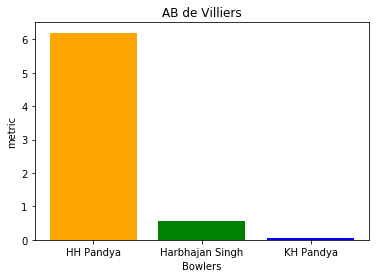

In [67]:
chart('AB de Villiers', a, 'metric')

In [61]:
plt.show()